# Classificação da idade dos abalones pelas características físicas

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Importando o dataset

In [2]:
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)

In [3]:
abalone = pd.read_csv(url, header=None)

In [4]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone.drop("Sex", axis=1, inplace=True)

In [5]:
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Explorando o dataframe

In [6]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Correlações

In [7]:
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


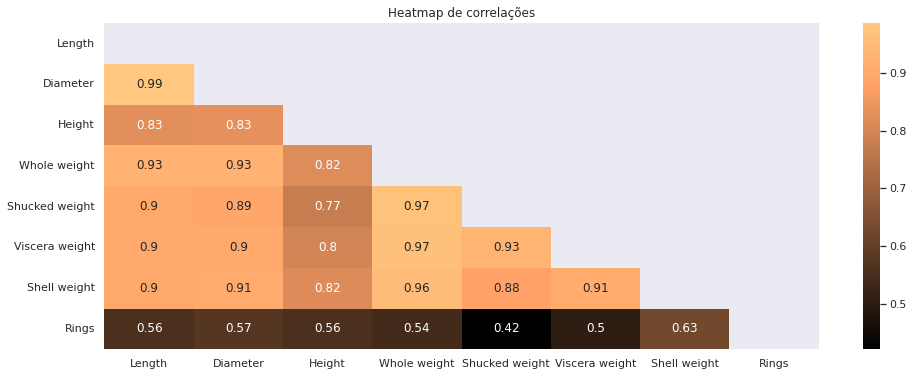

In [8]:
plt.figure(figsize=(16,6))

mask = np.triu(np.ones_like(abalone.corr()))

heatmap = sns.heatmap(abalone.corr(), mask=mask, annot=True, cmap='copper')

heatmap.set_title('Heatmap de correlações');

### Distribuição dos anéis

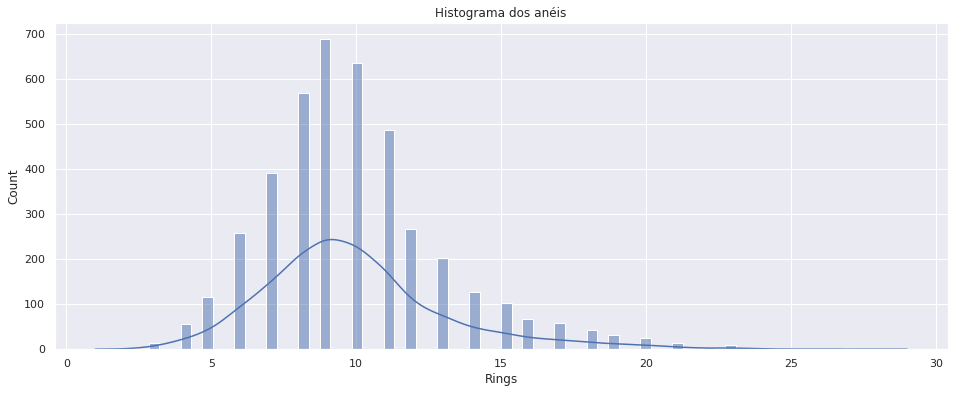

In [9]:
plt.figure(figsize=(16,6))

histogram = sns.histplot(abalone["Rings"], kde=True)

histogram.set_title('Histograma dos anéis');

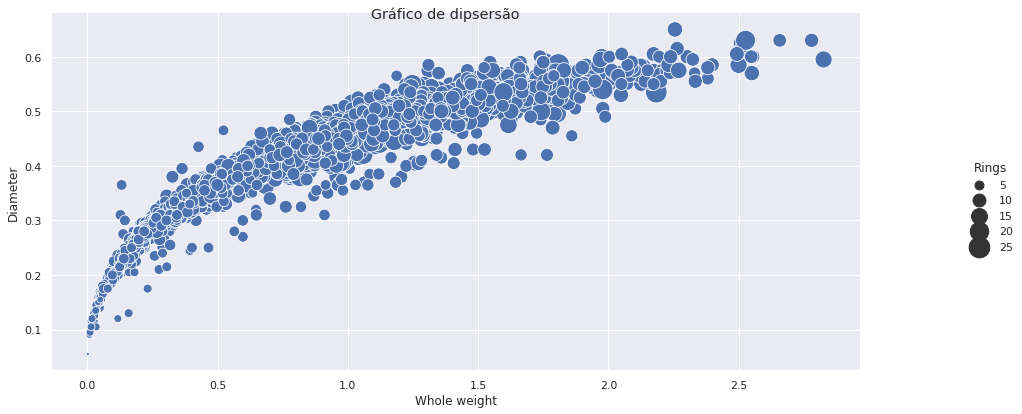

In [10]:
scatter = sns.relplot(data=abalone,
                      x="Whole weight",
                      y="Diameter",
                      size="Rings",
                      sizes=(10,500)
                     )

scatter.fig.set_size_inches(16,6)
scatter.fig.suptitle('Gráfico de dipsersão');

## Seleção de características

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
vt = VarianceThreshold(threshold=0)

In [13]:
vt.fit(abalone.drop("Rings", axis=1))

VarianceThreshold(threshold=0)

In [14]:
X_vt = abalone.drop("Rings", axis=1).iloc[:, vt.get_support()]

In [15]:
pd.DataFrame(
    {
        'Feature': X_vt.columns.tolist(),
        'Variance': vt.variances_
    }
).sort_values('Variance', ascending=True)

,Feature,Variance
2,Height,0.001749
1,Diameter,0.009846
5,Viscera weight,0.012012
0,Length,0.014419
6,Shell weight,0.019373
4,Shucked weight,0.049256
3,Whole weight,0.240424


In [16]:
colunas_relevantes = ['Viscera weight',
                      'Length',
                      'Shell weight',
                      'Shucked weight',
                      'Whole weight']

In [17]:
abalone_relev = abalone[colunas_relevantes]

## Usando o K-NN

### Particionando os dados

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = abalone.drop("Rings", axis=1).values
y = abalone["Rings"].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Criando e ajustando o modelo

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
def implement_KNN(k, distance, X_train, X_test, y_train, y_test):
    knn_model = KNeighborsRegressor(n_neighbors=k, metric=distance)
    knn_model.fit(X_train, y_train)
    
    rmse_dic = {}
    train_preds = knn_model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_preds)
    rmse_train = sqrt(mse_train)
    rmse_dic['rmse_train'] = rmse_train
    
    test_preds = knn_model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_preds)
    rmse_test = sqrt(mse_test)
    rmse_dic['rmse_test'] = rmse_test
    
    return train_preds, test_preds, rmse_dic

In [23]:
train_preds, test_preds, rmse_dic = implement_KNN(20, 'minkowski', X_train, X_test, y_train, y_test)

In [24]:
print('RMSE de treino: {}'.format(round(rmse_dic['rmse_train'], 4)))
print('RMSE de teste: {}'.format(round(rmse_dic['rmse_test'], 4)))

RMSE de treino: 2.0278
RMSE de teste: 2.2143


### Plotando os resultados

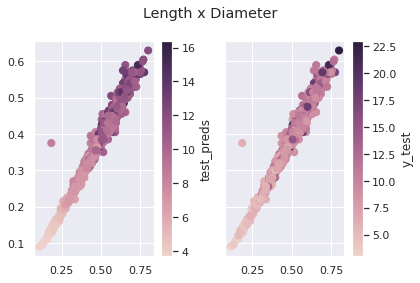

In [31]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(1, 2, sharey=True)

points = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
cbar = f.colorbar(points, ax=ax[0])
cbar.set_label('test_preds')

points = ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
cbar = f.colorbar(points, ax=ax[1])
cbar.set_label('y_test')

f.suptitle('Length x Diameter')
plt.tight_layout()
plt.show()

---

## Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV

* Apenas pelos valores de `k`

In [27]:
knn_model = KNeighborsRegressor()

In [28]:
param_grid = {
    'n_neighbors': list(range(1,50))
}
grid = GridSearchCV(knn_model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 1.61 s, sys: 0 ns, total: 1.61 s
Wall time: 1.61 s
{'n_neighbors': 22}


In [29]:
knn_model = grid.best_estimator_

test_preds = knn_model.predict(X_test)
train_preds = knn_model.predict(X_train)

mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
mse_test = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_test)

print('RMSE de treino: {}'.format(round(rmse_train, 4)))
print('RMSE de teste: {}'.format(round(rmse_test, 4)))

RMSE de treino: 2.0391
RMSE de teste: 2.209


### Plotando os resultados

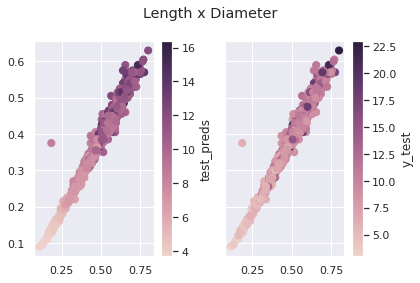

In [32]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(1, 2, sharey=True)

points = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
cbar = f.colorbar(points, ax=ax[0])
cbar.set_label('test_preds')

points = ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
cbar = f.colorbar(points, ax=ax[1])
cbar.set_label('y_test')

f.suptitle('Length x Diameter')
plt.tight_layout()
plt.show()

* "Grid search" entre os valores de `k` e métricas

As diferentes métricas disponíveis podem ser vista [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html).

In [43]:
import sklearn.neighbors

In [46]:
# sorted(sklearn.neighbors.VALID_METRICS['brute'])

In [33]:
knn_model2 = KNeighborsRegressor()

In [69]:
lista_distancias = ['manhattan',
                    'chebyshev',
                    'minkowski',
                    'hamming',
                    'canberra',
                    'braycurtis']

In [70]:
param_grid = {
    'n_neighbors': list(range(15,35)),
    'metric': lista_distancias
}
grid = GridSearchCV(knn_model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 7.92 s, sys: 43.9 ms, total: 7.96 s
Wall time: 7.97 s
{'metric': 'minkowski', 'n_neighbors': 22}


In [63]:
knn_model = grid.best_estimator_

test_preds = knn_model.predict(X_test)
train_preds = knn_model.predict(X_train)

mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
mse_test = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_test)

print('RMSE de treino: {}'.format(round(rmse_train, 4)))
print('RMSE de teste: {}'.format(round(rmse_test, 4)))

RMSE de treino: 2.0391
RMSE de teste: 2.209


### Plotando os resultados

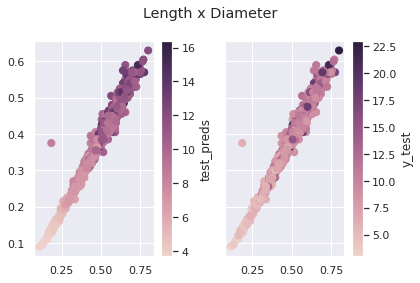

In [64]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(1, 2, sharey=True)

points = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
cbar = f.colorbar(points, ax=ax[0])
cbar.set_label('test_preds')

points = ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
cbar = f.colorbar(points, ax=ax[1])
cbar.set_label('y_test')

f.suptitle('Length x Diameter')
plt.tight_layout()
plt.show()

A o modelo otimizando aplicando o "Grid Search" na métrica e em `k` foi o mesmo encontrado fazendo uma busca apenas em `k`.
Talvez um rsultado diferente pode ser encontrado inserido mais parâmetros na grade.